In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('df_report_conv_weekly.csv')
df['week_date'] = pd.to_datetime(df['week_date']).dt.date
df

,week_date,deviceCategory,uniq_users,addedToCart,conv
0,2016-08-01,desktop,10983,940.0,8.56
1,2016-08-01,mobile,2146,123.0,5.73
2,2016-08-01,tablet,354,21.0,5.93
3,2016-08-08,desktop,11807,1101.0,9.32
4,2016-08-08,mobile,2371,152.0,6.41
...,...,...,...,...,...
127,2017-05-22,mobile,3274,165.0,5.04
128,2017-05-22,tablet,467,14.0,3.00
129,2017-05-29,desktop,3667,304.0,8.29
130,2017-05-29,mobile,1420,59.0,4.15


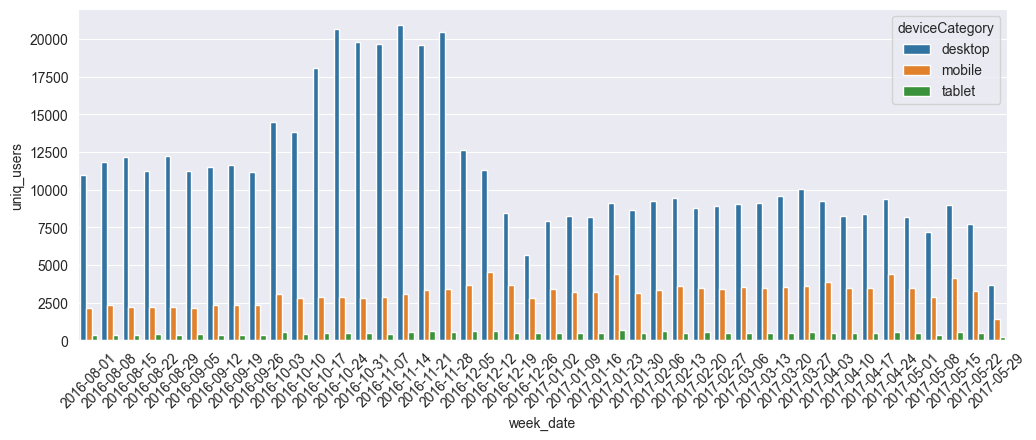

In [3]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.tight_layout()
ax = sns.barplot(df, x='week_date', y='uniq_users', hue='deviceCategory')

In [4]:
# another example of barplot is stacked barplot
# i could not replicate what was in course, so i had to make it differently
# main problem was that plt.bar cant correctly broadcast dfs if the have different indexes

In [5]:
# in the course this function returns dfc.set_index('deviceCategory') which will be different for each dataframe
# this is incorrect or at least not working for me, so i changed it to return dfs with week_date as index
def get_dataset_by_category(df, cat):
    dfc = df[df['deviceCategory'] == cat]
    return dfc.set_index('week_date')

In [6]:
df_desktop = get_dataset_by_category(df, 'desktop')
df_mobile = get_dataset_by_category(df, 'mobile')
df_tablet = get_dataset_by_category(df, 'tablet')

In [7]:
df_desktop.index.equals(df_mobile.index) and df_mobile.index.equals(df_tablet.index)

True

<BarContainer object of 44 artists>

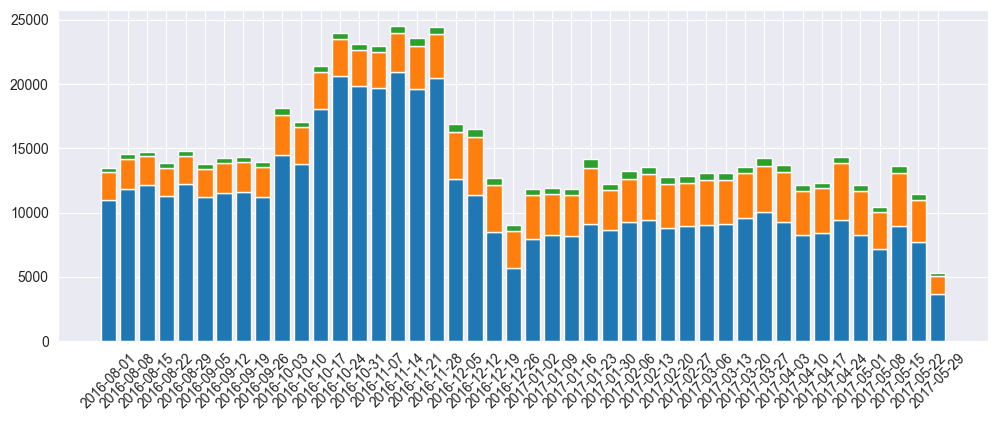

In [8]:
# date was displaying incorrectly (maybe because it is index now), so i make it a string
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.tight_layout()
# so to make stckaed barplot i just need to stack dframes it is made of
plt.bar(x=df_desktop.index.astype('str'), height=df_desktop['uniq_users'], label='desktop')
plt.bar(x=df_mobile.index.astype('str'), height=df_mobile['uniq_users'], bottom=df_desktop['uniq_users'], label='mobile')
plt.bar(x=df_tablet.index.astype('str'), height=df_tablet['uniq_users'],
         bottom=df_desktop['uniq_users']+df_mobile['uniq_users'], label='tablet')

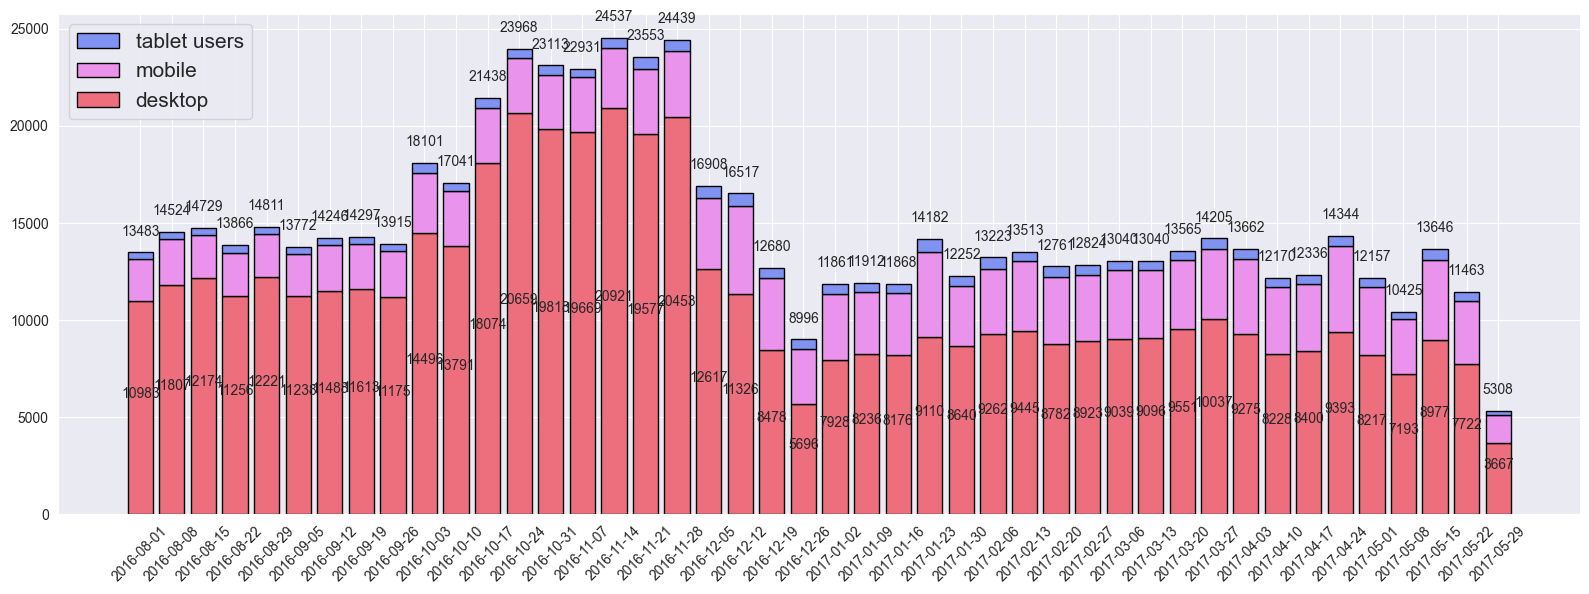

In [28]:
# i can customize stacked barplot
figure = plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)

ax = plt.bar(
    x=df_desktop.index.astype('str'),
    height=df_desktop['uniq_users'],
    label='desktop',
    edgecolor='black', # adds edge to bin
    linewidth=1, # determines color of the edge
    color='#ed6f7e' # determines color of the bin
)

ax2 = plt.bar(
    x=df_mobile.index.astype('str'),
    height=df_mobile['uniq_users'],
    bottom=df_desktop['uniq_users'],
    label='mobile',
    edgecolor='black',
    linewidth=1,
    color='#ea93ed'
)

ax3 = plt.bar(
    x=df_tablet.index.astype('str'),
    height=df_tablet['uniq_users'],
    bottom=df_desktop['uniq_users']+df_mobile['uniq_users'],
    label='tablet',
    edgecolor='black',
    linewidth=1,
    color='#8093f2',
    width=0.8 # determines width if the column section
)

plt.tight_layout()
plt.bar_label(ax3, padding=10) # adds values to bins, padding determines how far are the values
plt.bar_label(ax, padding=10, label_type='center') # label_type by default is 'edge', but i can set it to 'center'
# here is how to make custom legend
plt.legend((ax3[0], ax2[0], ax[0]), ('tablet users', 'mobile', 'desktop'), loc='upper left', fontsize=15)